Вариант №10

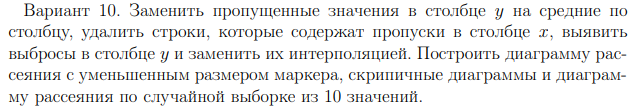

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [117]:
# считываем данные с 10 листа, учитывая что их индексация начинается с 0
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Семинар 4 (1).xlsx', sheet_name=9, names=['-', 'x', 'y']).drop('-', axis=1)
data

,x,y
0,-4.879961,-5.731149
1,-6.599182,-7.186746
2,-8.002274,-10.414443
3,4.270452,5.913454
4,15.699627,16.307753
...,...,...
995,4.700826,2.749287
996,8.044238,7.550891
997,19.167064,24.478110
998,12.184110,13.129870


In [106]:
# анализируем пропуски в обоих стобцах
missed_x, missed_y = pd.isnull(data['x']), pd.isnull(data['y'])
data[missed_x]

,x,y
140,NaN,-10.683866
840,NaN,-21.584882


In [118]:
data[missed_y]

,x,y
318,-4.093042,NaN
857,-22.478425,NaN


In [119]:
# заменяем пропуски в столбце y на средние значения по стобцу
data['y'] = data['y'].fillna(data['y'].mean())
# проверка
data[missed_y]

,x,y
318,-4.093042,1.450191
857,-22.478425,1.450191


In [120]:
# удаляем строки, которые содержат пропуски в столбце х
data = data.dropna(axis=0, how='any')
# проверка (общее число строк должно стать на две меньше)
data

,x,y
0,-4.879961,-5.731149
1,-6.599182,-7.186746
2,-8.002274,-10.414443
3,4.270452,5.913454
4,15.699627,16.307753
...,...,...
995,4.700826,2.749287
996,8.044238,7.550891
997,19.167064,24.478110
998,12.184110,13.129870


In [121]:
# для выявления выбросов в стобце y, установим верхнюю и нижнюю границы по следующим формулам
array=data.to_numpy()
q_025 = np.quantile(array[:, 1], 0.25)
q_075 = np.quantile(array[:, 1], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd
print('Первая квартиль =', q_025)
print('Третья квартиль =', q_075)
print('Межквартильное расстояние =', iqd)
print('Верхняя граница =', upper_limit)
print('Нижняя граница =', lower_limit)

# выявляем строки с выбросами (нам нужны их индексы)
data_cut = data[(data['y'] > upper_limit) | (data['y'] < lower_limit)]
data_cut

Первая квартиль = -7.893255444208697
Третья квартиль = 9.173625966366334
Межквартильное расстояние = 17.066881410575032
Верхняя граница = 34.773948082228884
Нижняя граница = -33.493577560071245


,x,y
216,130.953760,133.209092
391,979.141357,978.034414
396,-44.391168,35.266470
673,335.130806,336.344521
688,-29.579302,39.336391
792,-561.879752,-561.339957
815,59.186356,51.875887
838,34.248670,35.381513


In [122]:
# присвоим выбросам значение NaN, чтобы применить функцию interpolate(), заменяющую ячейки NaN на интерполяцию
data.loc[data_cut.index, 'y'] = np.nan
data.loc[data_cut.index]

,x,y
216,130.953760,NaN
391,979.141357,NaN
396,-44.391168,NaN
673,335.130806,NaN
688,-29.579302,NaN
792,-561.879752,NaN
815,59.186356,NaN
838,34.248670,NaN


In [123]:
# заменяем выбросы в столбце y на интерполяцию
data['y'] = data['y'].interpolate()

# проверка
data.loc[data_cut.index]

<ipython-input-123-adfa1fcbc3b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data['y'].interpolate()


,x,y
216,130.953760,5.722797
391,979.141357,-10.927435
396,-44.391168,-6.134966
673,335.130806,-0.941033
688,-29.579302,2.160501
792,-561.879752,1.066135
815,59.186356,-9.612162
838,34.248670,1.237162


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


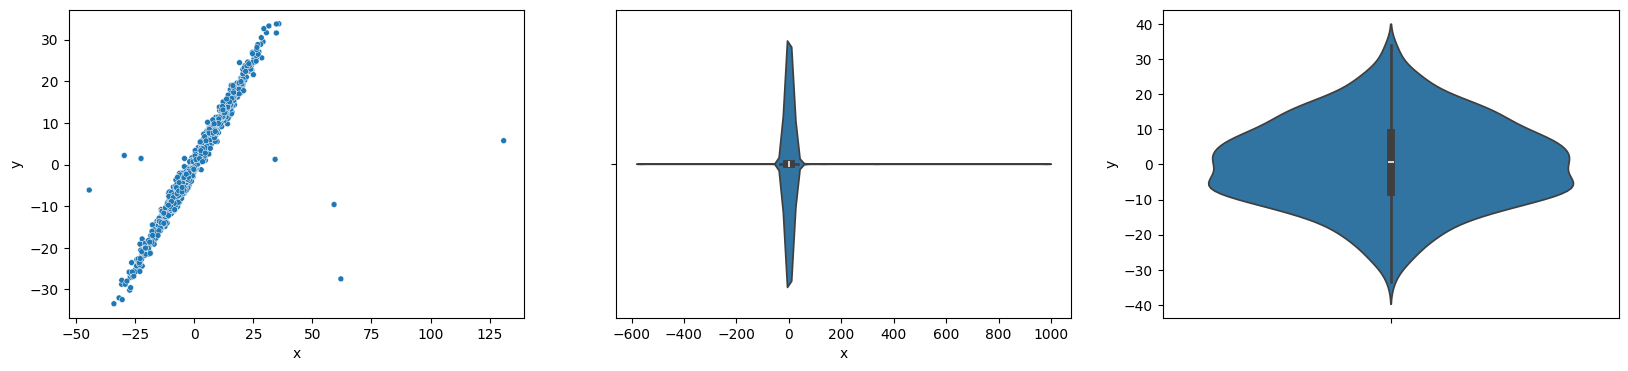

In [125]:
# диаграмма рассеяния с уменьшенным размером маркера и скрипичные диаграммы для всего набора данных
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
p1 = sns.scatterplot(x=data['x'], y=data['y'], size=0.01, legend=False, ax = axes[0])
p2 = sns.violinplot(x=data['x'], ax = axes[1])
p3 = sns.violinplot(y=data['y'], ax = axes[2])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


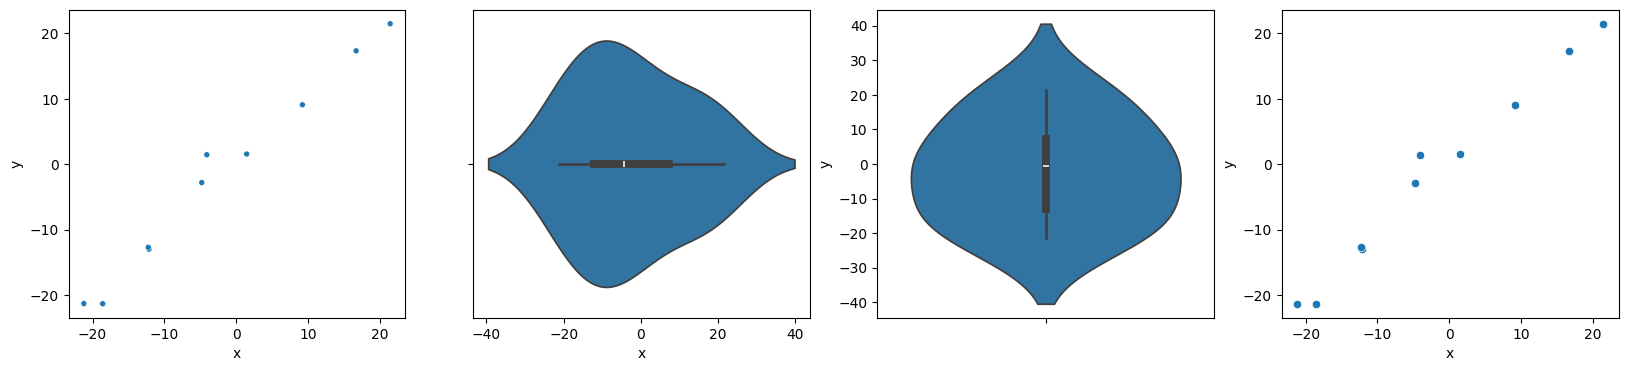

In [ ]:
# диаграмма рассеяния с уменьшенным размером маркера, скрипичные диаграммы и диаграмма рассеяния по случайной выборке из 10 значений
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
data_select = data.sample(10)
p1 = sns.scatterplot(x=data_select['x'], y=data_select['y'], size=0.01, legend=False, ax = axes[0])
p2 = sns.violinplot(x=data_select['x'], ax = axes[1])
p3 = sns.violinplot(y=data_select['y'], ax = axes[2])
p4 = sns.scatterplot(x=data_select['x'], y=data_select['y'], legend=False, ax = axes[3])